In [1]:
import pandas as pd

In [3]:
X = pd.read_csv("C:/Users/Aneesh Raskar/OneDrive/Desktop/IOT Project/cropdata.csv")
X.head()

,CropType,CropDays,SoilMoisture,temperature,Humidity,Irrigation
0,Wheat,10.0,400.0,30.0,15.0,0.0
1,Wheat,7.0,200.0,30.0,32.0,0.0
2,Wheat,9.0,300.0,21.0,28.0,0.0
3,Wheat,3.0,500.0,40.0,22.0,0.0
4,Wheat,2.0,700.0,23.0,34.0,0.0


In [4]:
unique_crop_types = X['CropType'].unique()

print(len(unique_crop_types))
unique_crop_types

10


array(['Wheat', nan, 'Groundnuts', 'Garden Flowers', 'Maize', 'Paddy',
       'Potato', 'Pulse', 'Sugarcane', 'Coffee'], dtype=object)

In [5]:
X_train_Id = X.iloc[:, 0]
y = X.iloc[:, -1]
X = X.iloc[:, 0:-1]
print(X_train_Id.head())
print(y.head())
X.head()

0    Wheat
1    Wheat
2    Wheat
3    Wheat
4    Wheat
Name: CropType, dtype: object
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Irrigation, dtype: float64


,CropType,CropDays,SoilMoisture,temperature,Humidity
0,Wheat,10.0,400.0,30.0,15.0
1,Wheat,7.0,200.0,30.0,32.0
2,Wheat,9.0,300.0,21.0,28.0
3,Wheat,3.0,500.0,40.0,22.0
4,Wheat,2.0,700.0,23.0,34.0


In [6]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Irrigation, dtype: float64

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

numerical_columns = ['CropDays', 'SoilMoisture', 'temperature', 'Humidity']
categorical_columns = ['CropType']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),  
        ('cat', OrdinalEncoder(), categorical_columns)
    ])

transformed_data = preprocessor.fit_transform(X)

X_transformed = pd.DataFrame(transformed_data, columns=numerical_columns + categorical_columns)

X_transformed.head()

,CropDays,SoilMoisture,temperature,Humidity,CropType
0,10.0,400.0,30.0,15.0,8.0
1,7.0,200.0,30.0,32.0,8.0
2,9.0,300.0,21.0,28.0,8.0
3,3.0,500.0,40.0,22.0,8.0
4,2.0,700.0,23.0,34.0,8.0


In [9]:
unique_crop_types = X_transformed['CropType'].unique()

print(len(unique_crop_types))
unique_crop_types

10


array([ 8., nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.,  0.])

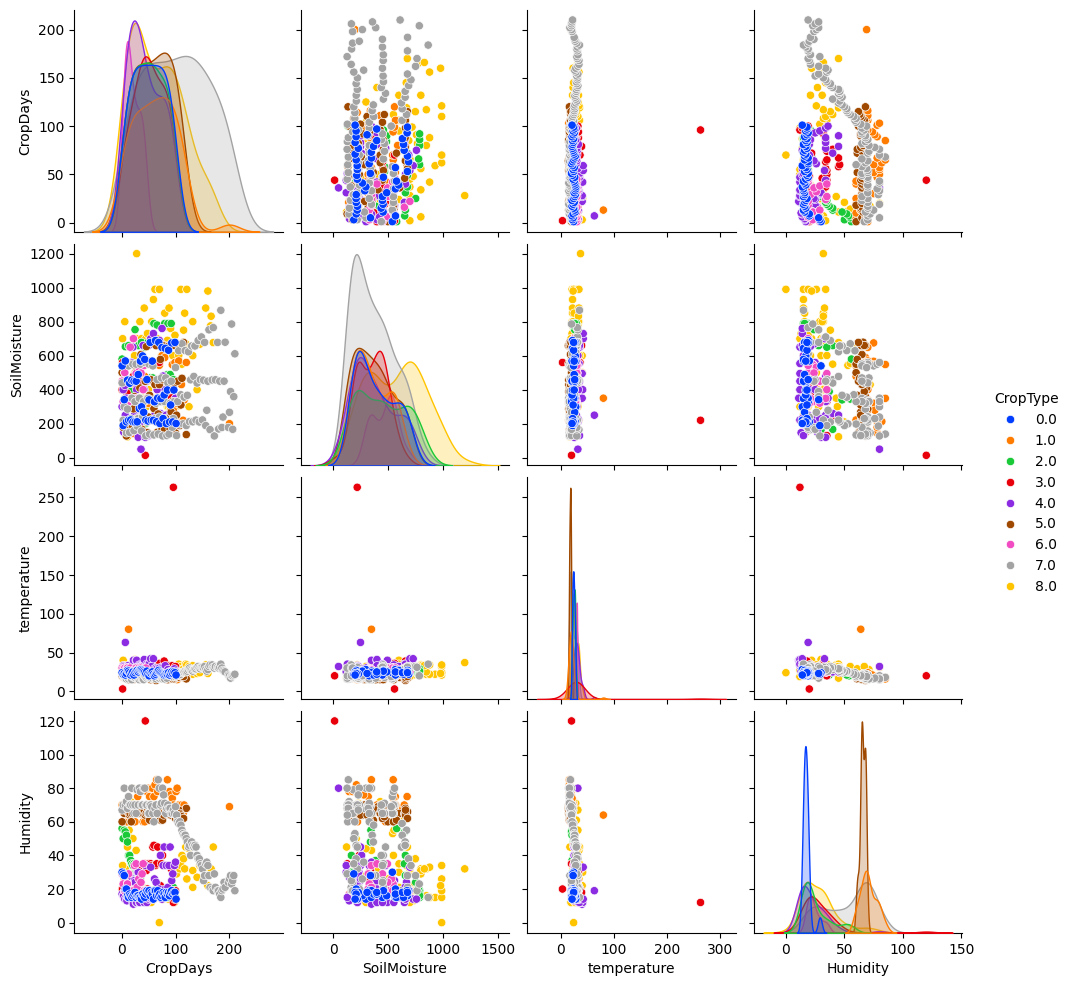

In [11]:
import seaborn as sns
sns.pairplot(X_transformed, hue='CropType', palette="bright")

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [153]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2', ],
              'splitter' : ['best', 'random'],
              'ccp_alpha': [10, 1, 0.1, .01, .001, .0001],
              'max_depth' : [7,8,9,10,11, 12],
              'criterion' :['gini', 'entropy', 'log_loss'],
              'min_samples_leaf' : [2,3,4,5,6,7],
              'random_state' : [1, 2],
              'max_features': [3, 4, 5, 6, 7, 8]
             }
tree_class = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree_class, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_transformed, y)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [7, 8, 9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'random_state': [1, 2],
                         'splitter': ['best', 'random']},
             verbose=True)

In [154]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)


In [21]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.71287129, 0.86      , 0.94      , 0.91      , 0.96      ])

In [12]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=11,
                       max_features=4, min_samples_leaf=5, random_state=1)
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.71287129, 0.86      , 0.94      , 0.91      , 0.96      ])

In [14]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=16,
                       max_features=5, min_samples_leaf=3, random_state=2,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.74257426, 0.83      , 0.9       , 0.85      , 0.91      ])

In [143]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=18,
                       max_features=7, min_samples_leaf=2, random_state=1,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.73267327, 0.85      , 0.82      , 0.89      , 0.88      ])

In [16]:
clf = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=25,
                       max_features=10, min_samples_leaf=2, random_state=1,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.73267327, 0.85      , 0.82      , 0.89      , 0.88      ])

In [18]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=29, max_features=27,
                       splitter='random')
scores = cross_val_score(clf, X_transformed, y, cv=5)
scores

array([0.75247525, 0.74      , 0.72      , 0.91      , 0.86      ])

In [23]:
clf.fit(X_transformed, y)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)

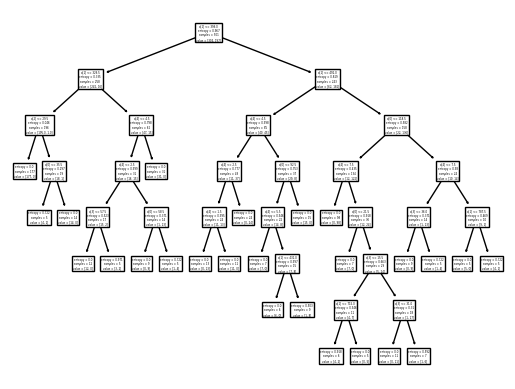

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

In [74]:
dtree = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)
dtree.fit(X_transformed , y)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features=4, min_samples_leaf=5, random_state=1)

In [75]:
y_pred = dtree.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9801980198019802

In [77]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1]


In [78]:
import joblib

In [79]:
joblib.dump(dtree, 'decision_tree.joblib')

['decision_tree.joblib']

In [81]:
x_test.head()

,CropDays,SoilMoisture,temperature,Humidity,CropType
362,29.0,186.0,18.0,79.0,7.0
73,156.0,880.0,34.0,33.0,8.0
375,54.0,222.0,17.0,70.0,7.0
155,72.0,210.0,18.0,70.0,1.0
104,53.0,469.0,27.0,18.0,2.0


In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
